In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from scipy.integrate import odeint 
from scipy.optimize import curve_fit

In [2]:
Data_year=pd.read_csv('data_year.csv')

In [3]:
Data_year.head()

,year,co2 global mean(ppm),co2 uncertainty(ppm)
0,1984,344.3,0.1
1,1985,345.7,0.1
2,1986,347.2,0.1
3,1987,349.0,0.1
4,1988,351.4,0.1


In [4]:
Time_year=Data_year['year']
co2_year_trend=Data_year['co2 global mean(ppm)']

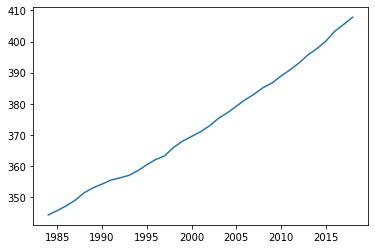

In [5]:
plt.plot(Time_year,co2_year_trend)

In [6]:
Data_month=pd.read_csv('Data_moth.csv')

In [7]:
Data_month.head(12)

,year,month,mole fraction(ppm),trend(ppm),growth rate(ppm/yr)
0,1984,1,345.10,343.61,NaN
1,1984,2,345.51,343.74,NaN
2,1984,3,345.72,343.87,NaN
3,1984,4,345.75,343.99,NaN
4,1984,5,345.27,344.11,NaN
5,1984,6,344.11,344.24,NaN
6,1984,7,342.48,344.35,NaN
7,1984,8,341.52,344.47,NaN
8,1984,9,341.98,344.59,NaN
9,1984,10,343.43,344.71,NaN


In [8]:
co2_mole=Data_month['mole fraction(ppm)']#[:12]
co2_trend=Data_month['trend(ppm)']
Time_month=np.arange(1.,421.)
co2_cycle=co2_mole-co2_trend

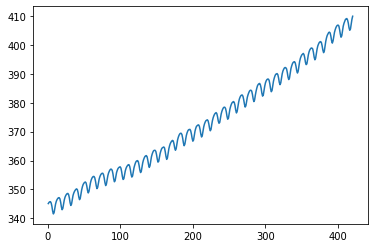

In [9]:
plt.plot(Time_month,co2_mole)

In [10]:
co2_month_cycle=co2_mole-co2_trend

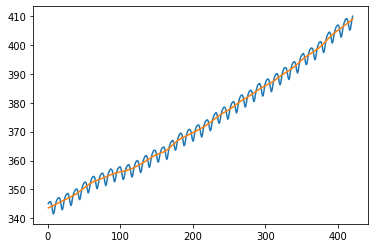

In [11]:
plt.plot(Time_month,co2_mole)
plt.plot(Time_month,co2_trend)


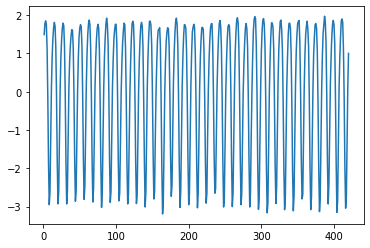

In [12]:
plt.plot(Time_month,co2_cycle)

In [13]:
def Model(x,A,w,m,b):
    return A*np.sin(x*w)+m*x + b
def F1(x,A,w,c):
    return A*np.sin(w*(x+c))
def F2(x,m,b):
    return m*x +b

In [14]:
popt, pcov = curve_fit(F2,Time_month,co2_trend)

In [15]:
popt

array([1.53019042e-01, 3.40814968e+02])

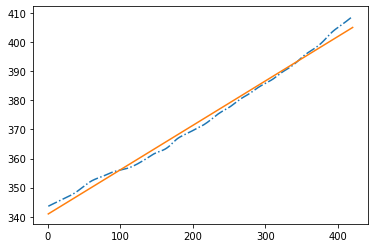

In [16]:
plt.plot(Time_month,co2_trend,'-.')
plt.plot(Time_month,F2(Time_month,*popt))

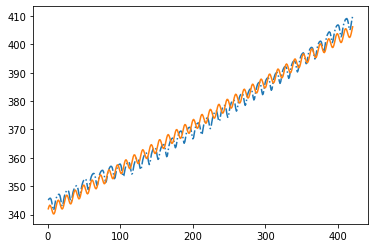

In [17]:
plt.plot(Time_month,co2_mole,'-.')
plt.plot(Time_month,Model(Time_month,2,0.54,1.52894161e-01,3.40847208e+02))
#plt.xlim(0,12*3)

(180, 300)

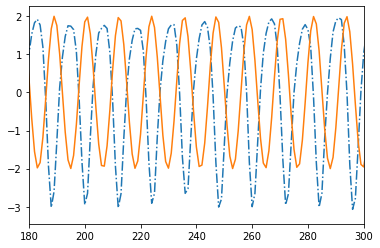

In [18]:
plt.plot(Time_month,co2_cycle,'-.')
plt.plot(Time_month,F1(Time_month,2,0.54,0))
plt.xlim(12*15,12*25)